# Tutorial to Lecture 2 (course "Deep learning"):

### Author: Pavlo Mozharovskyi

## Task 1: A simple example

### a) Load the MNIST data

Load libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
tf.keras.backend.set_floatx('float64')
from tensorflow.keras import backend as K
# Print tensorflow version
print(tf.__version__)
# Fix Mac-connected problems
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Another way to fix Mac-connected problems
# conda install nomkl
np.random.seed(1)
tf.random.set_seed(1)

2.9.1


Import the MNIST data and rescale it

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 1s 0us/step


Visualise first 10 digits

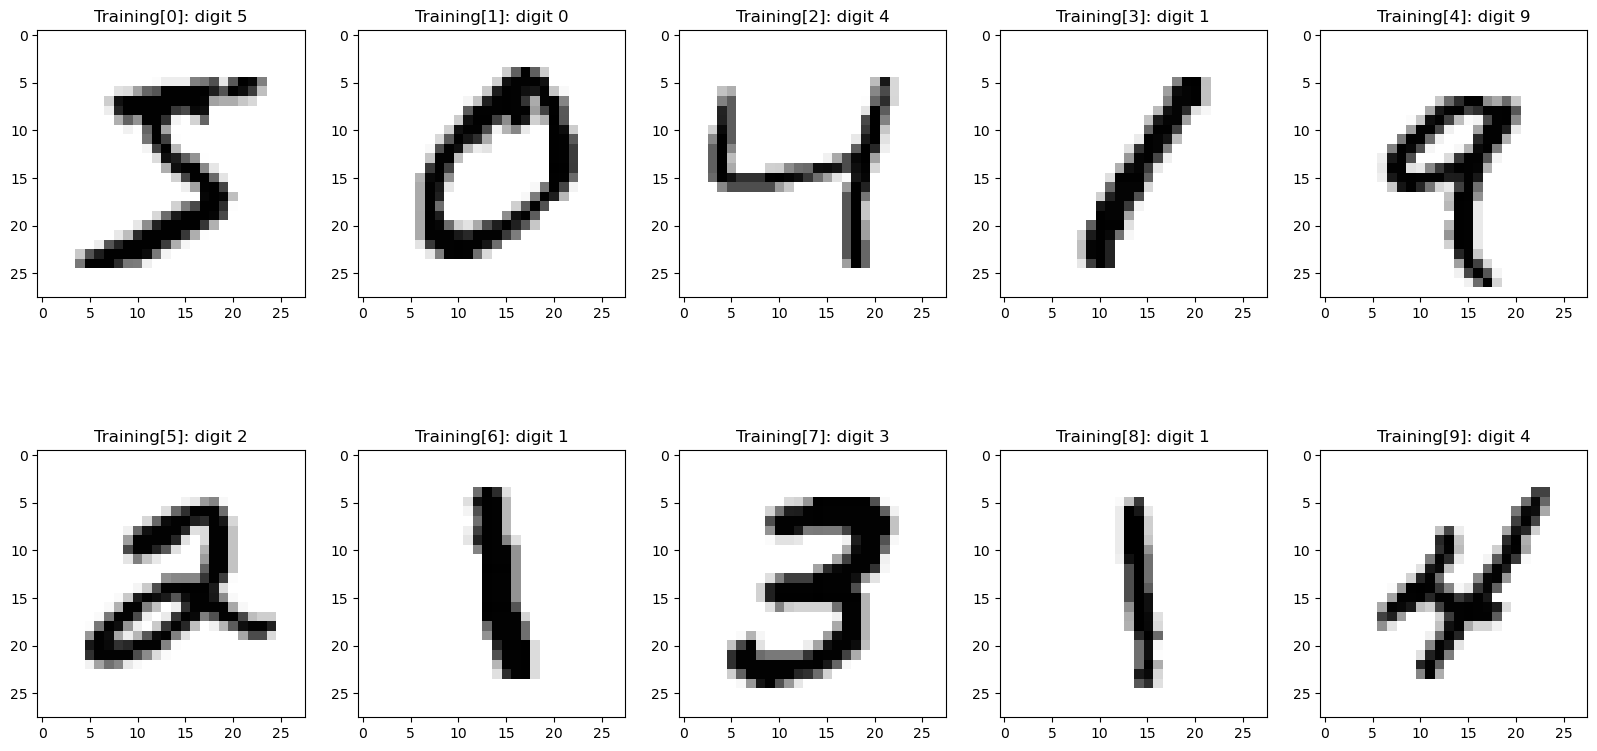

In [3]:
plt.figure(1, figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i,:,:], cmap=plt.cm.gray_r)
    plt.title('Training[' + str(i) + ']: digit ' + str(y_train[i]))

### b) Flatten the data

Select train/test subsamples

In [4]:
idx_train = np.array(range(x_train.shape[0]))[(y_train == 0) | (y_train == 1)][:200]
print(idx_train.shape)
idx_test = np.array(range(len(x_test)))[(y_test == 0) | (y_test == 1)][:2000]
print(idx_test.shape)

(200,)
(2000,)


In [5]:
x1_train = x_train[idx_train,:,:]
y1_train = y_train[idx_train]
print(y1_train)
x1_test = x_test[idx_test,:,:]
y1_test = y_test[idx_test]

[0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0
 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0]


Flatten the data (for dense layers)

In [6]:
x1_train_flat = x1_train.reshape(x1_train.shape[0], 28 * 28)
print(x1_train_flat.shape)
x1_test_flat = x1_test.reshape(x1_test.shape[0], 28 * 28)
print(x1_test_flat.shape)

(200, 784)
(2000, 784)


### c) Fit a simple neural network

Construct a network

In [7]:
nn1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
print(nn1)

2022-11-18 20:00:02.490882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Check a simple output

In [8]:
forecast0 = nn1(x1_train_flat[:1]).numpy()
print(forecast0)

[[0.38068401]]


Compile the network: choose the optimiser, define the loss, and the metrics

In [9]:
nn1.compile(optimizer='adam', loss=tf.keras.losses.MSE, metrics=['accuracy'])

In [10]:
nn1.fit(x1_train_flat, y1_train, epochs=15)

Epoch 1/15
7/7 [==============================] - 0s 1ms/step - loss: 0.2738 - accuracy: 0.4500
Epoch 2/15
7/7 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.4500
Epoch 3/15
7/7 [==============================] - 0s 1ms/step - loss: 0.2355 - accuracy: 0.4500
Epoch 4/15
7/7 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.4500
Epoch 5/15
7/7 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.5650
Epoch 6/15
7/7 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.7500
Epoch 7/15
7/7 [==============================] - 0s 1ms/step - loss: 0.1887 - accuracy: 0.8900
Epoch 8/15
7/7 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9400
Epoch 9/15
7/7 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 0.9700
Epoch 10/15
7/7 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9850
Epoch 11/15
7/7 [======================

Check on the test sample

In [11]:
forecast1 = nn1(x1_test_flat).numpy()
print((forecast1[:,0] > 0.5).astype(int).shape)
print(y1_test.shape)
print('Accuracy of NN on test data 1: ' + str(np.mean((forecast1[:,0] > 0.5).astype(int) == y1_test)))

(2000,)
(2000,)
Accuracy of NN on test data 1: 0.998


### d) Repeat on digits 4 vs 9

In [12]:
np.random.seed(1)
tf.random.set_seed(1)

Extract training and test sets

In [13]:
idx_train = np.array(range(x_train.shape[0]))[(y_train == 4) | (y_train == 9)][:200]
print(idx_train.shape)
idx_test = np.array(range(len(x_test)))[(y_test == 4) | (y_test == 9)][:2000]
print(idx_test.shape)
x2_train = x_train[idx_train,:,:]
y2_train = y_train[idx_train]
print(y2_train)
x2_test = x_test[idx_test,:,:]
y2_test = y_test[idx_test]

(200,)
(1991,)
[4 9 4 9 4 9 4 9 9 9 9 4 9 9 4 4 4 4 9 9 4 4 9 4 9 4 4 9 4 4 4 9 9 9 4 4 4
 9 9 9 9 9 4 9 4 4 9 9 4 9 4 9 9 4 4 4 9 9 9 4 4 4 4 9 9 4 9 9 4 9 4 4 4 9
 9 9 4 9 4 9 4 4 4 9 4 4 9 9 4 9 4 4 4 9 9 9 9 9 4 9 4 9 4 9 4 9 9 9 9 9 9
 4 4 9 4 9 4 4 9 9 4 9 4 9 9 9 4 4 4 9 9 9 9 4 4 4 4 4 4 4 9 4 4 4 9 4 9 4
 4 9 4 9 4 9 4 4 4 9 9 9 9 9 9 9 4 9 4 9 9 9 9 9 4 4 4 4 4 4 4 4 9 4 4 9 4
 4 4 9 9 4 4 4 9 9 9 4 9 4 4 9]


Redefine the loss

In [14]:
class CatCrossE49(tf.keras.losses.Loss):
    def call(self, y_true, y_pred):
        y_pred = tf.convert_to_tensor(y_pred)
        y_true = tf.cast(y_true, y_pred.dtype)
        y_true_resc = (y_true - 4) / 5
        return K.mean(tf.square(y_pred - y_true_resc), axis=-1)
msl2 = CatCrossE49()

Fit the neural network

In [15]:
nn2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [16]:
nn2.compile(optimizer='adam', 
            loss=msl2,
            metrics=['accuracy'])
nn2.fit(x2_train, y2_train, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 949us/step - loss: 0.3004 - accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2718 - accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.0000e+00
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.0000e+00
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.0000e+00
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2543 - accuracy

Test on the new samples (4 vs 9)

In [17]:
forecast2 = nn2(x2_test).numpy()
print(((forecast2[:,1] > forecast2[:,0]) * 5 + 4).shape)
print(y2_test.shape)
print('Accuracy of NN on test data 2: ' + str(np.mean(((forecast2[:,1] > forecast2[:,0]) * 5 + 4) == y2_test)))

(1991,)
(1991,)
Accuracy of NN on test data 2: 0.8704168759417378


### e) Compare with LDA

For 0 vs. 1

In [18]:
lda1 = LinearDiscriminantAnalysis()
lda1.fit(x1_train_flat, y1_train)
forecast3 = lda1.predict(x1_test_flat)
print(forecast3.shape)
print(y1_test.shape)
print('Accuracy of LDA on test data 1: ' + str(np.mean(forecast3 == y1_test)))

(2000,)
(2000,)
Accuracy of LDA on test data 1: 0.9935


For 4 vs. 9

In [19]:
lda2 = LinearDiscriminantAnalysis()
lda2.fit(x2_train.reshape(x2_train.shape[0], 28 * 28), y2_train)
forecast4 = lda2.predict(x2_test.reshape(x2_test.shape[0], 28 * 28))
print(forecast4.shape)
print(y2_test.shape)
print('Accuracy of LDA on test data 2: ' + str(np.mean(forecast4 == y2_test)))

(1991,)
(1991,)
Accuracy of LDA on test data 2: 0.8965344048216977


## Task 2: Convolutional neural network

In [20]:
np.random.seed(1)
tf.random.set_seed(1)

### a) Subsample the training set

(1000, 28, 28, 1)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 7 8 1 9 2 0 5 1 2 2 7 3 5
 4 9 7 

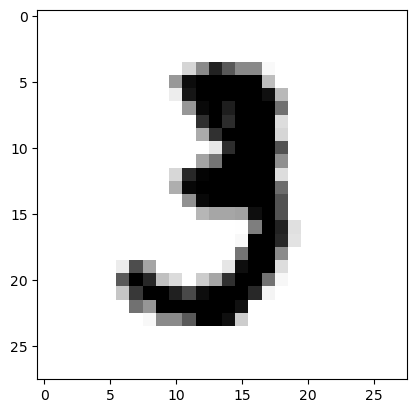

In [21]:
x3_train = x_train[:1000,:,:].reshape(1000,28,28,1)
print(x3_train.shape)
y3_train = y_train[:1000]
print(y3_train)
plt.imshow(x3_train[10,:,:,0], cmap=plt.cm.gray_r)

### b) Fit the neural network

Create the network

In [22]:
nn3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(12, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 12)          1212      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 12)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

Compile the network

In [23]:
nn3.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

Train the network

In [24]:
nn3.fit(x3_train, y3_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2410 - accuracy: 0.2600
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.8061 - accuracy: 0.5290
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9565 - accuracy: 0.7890
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.8500
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8840
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3378 - accuracy: 0.9040
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.9220
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2549 - accuracy: 0.9320
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9410
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9410


### c) Evaluate the accuracy

Test the network

In [25]:
forecast5 = nn3(x_test.reshape(x_test.shape[0],28,28,1)).numpy()
print(np.argmax(forecast5, 1).shape)
print(y_test.shape)
print('Accuracy of NN on full test data: ' + str(np.mean(np.argmax(forecast5, 1) == y_test)))

(10000,)
(10000,)
Accuracy of NN on full test data: 0.9022
